In [5]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

---
Import Dataset

In [6]:
#data import
game_data = pd.read_csv('data/clean_data.csv')

In [4]:
#Check the vital statistics of the dataset using the `type` and `shape` attributes.
print("Data type : ", type(game_data))
print("Data dims : ", game_data.shape)

#Check the variables (and their types) in the dataset using the `dtypes` attribute.
print(game_data.dtypes)

#quick look at the data
game_data.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (18174, 31)
Unnamed: 0                      int64
AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                         int64
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Positive                        int64
Negative                        int64
Recommendations                 int64
Notes                          object
Average playtime forever        int64
Average playtime two weeks      int64
Median playtime forever         int64
Median playt

,Unnamed: 0,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,...,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Rate_Ratio
0,5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,Feel tired of auto-fight? Feel tired of boring...,...,0,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",0.639706
1,8,1178150,MazM: Jekyll and Hyde,"Apr 2, 2020",0 - 20000,1,0,14.99,0,'MazM: Jekyll and Hyde' is a darkly entertaini...,...,0,0,0,0,Growing Seeds,"CFK Co., Ltd.","Single-player,Steam Achievements,Full controll...","Adventure,RPG,Simulation,Strategy","Adventure,Simulation,RPG,Strategy,Singleplayer...",0.926829
2,9,320150,Deadlings: Rotten Edition,"Nov 11, 2014",50000 - 100000,0,0,3.99,0,Death is lonely. He has zero friends on his Fa...,...,703,0,782,0,ONE MORE LEVEL,ONE MORE LEVEL,"Single-player,Steam Achievements,Steam Trading...","Action,Adventure,Indie","Action,Indie,Adventure,Puzzle-Platformer,Arcad...",0.833333
3,10,1026420,WARSAW,"Oct 2, 2019",20000 - 50000,5,0,23.99,0,Use everything at your disposal to help a team...,...,67,0,93,0,Pixelated Milk,"Pixelated Milk,gaming company","Single-player,Steam Achievements,Steam Trading...","Indie,RPG","Tactical RPG,Turn-Based Strategy,Wargame,Histo...",0.735331
4,11,485000,Cthulhu Realms,"Jul 1, 2016",50000 - 100000,0,0,0.00,1,Star Realms has gone insane! Introducing Cthul...,...,224,0,257,0,"Wise Wizard Games, LLC","Wise Wizard Games, LLC","Single-player,Multi-player,Shared/Split Screen...",Strategy,"Card Game,Strategy,Deckbuilding,Lovecraftian,B...",0.717073


In [5]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18174 entries, 0 to 18173
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  18174 non-null  int64  
 1   AppID                       18174 non-null  int64  
 2   Name                        18174 non-null  object 
 3   Release date                18174 non-null  object 
 4   Estimated owners            18174 non-null  object 
 5   Peak CCU                    18174 non-null  int64  
 6   Required age                18174 non-null  int64  
 7   Price                       18174 non-null  float64
 8   DLC count                   18174 non-null  int64  
 9   About the game              18149 non-null  object 
 10  Supported languages         18174 non-null  object 
 11  Full audio languages        18174 non-null  object 
 12  Reviews                     18174 non-null  int64  
 13  Windows                     181

---
Positive: number of positive reviews <br>
Negative: number of negative reviews

In [6]:
rate_ratio = pd.DataFrame(game_data["Rate_Ratio"])
price = pd.DataFrame(game_data['Price']) 
rate_price = pd.DataFrame(game_data[["Rate_Ratio", "Price"]])

In [7]:
rate_price['Rate_Ratio'] = rate_price['Rate_Ratio'] * 100

rate_price.describe().round(2)

,Rate_Ratio,Price
count,18174.00,18174.00
mean,78.09,10.75
std,15.70,11.21
min,2.53,0.00
25%,69.61,1.99
50%,81.69,7.99
75%,90.21,14.99
max,100.00,89.99


<AxesSubplot:>

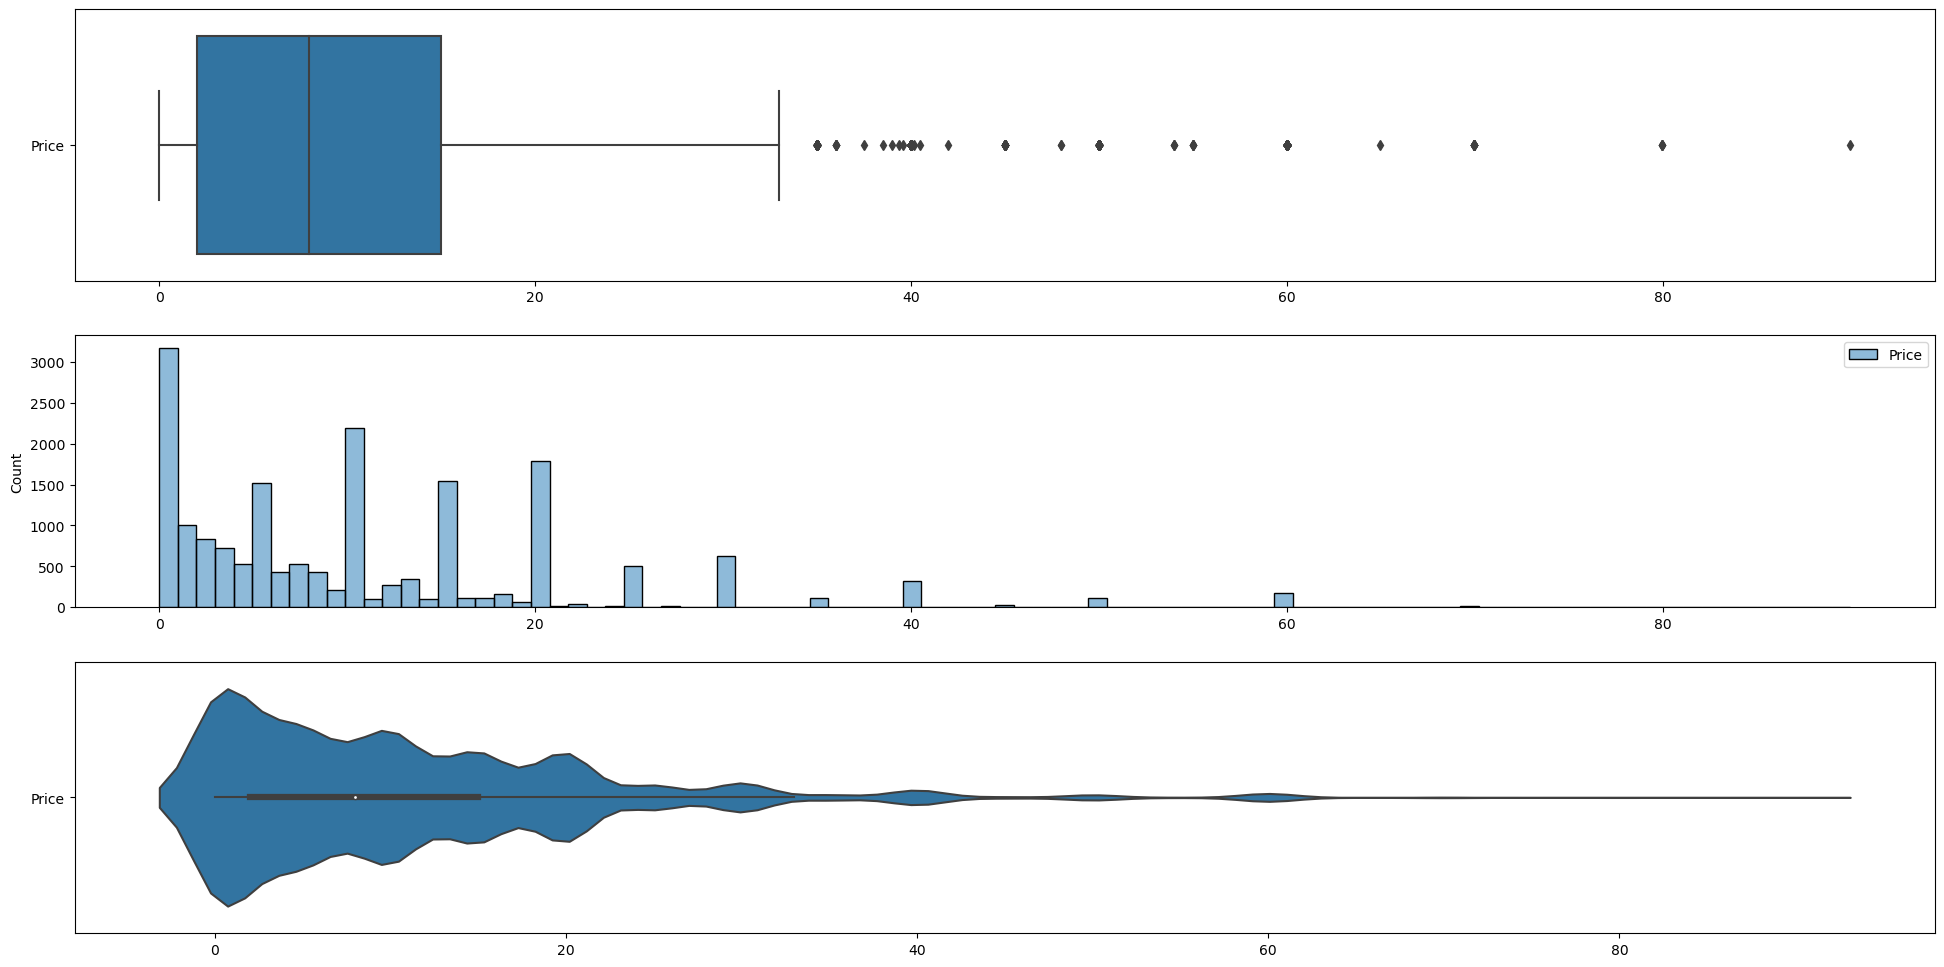

In [8]:
f, axes = plt.subplots(3, 1, figsize=(24, 12))
plt.ticklabel_format(style='plain')
sb.boxplot(data = price, orient = "h", ax = axes[0])
sb.histplot(data = price, ax = axes[1])
sb.violinplot(data = price, orient = "h", ax = axes[2])

In [9]:
rate_price.corr()

,Rate_Ratio,Price
Rate_Ratio,1.000000,0.095401
Price,0.095401,1.000000


In [10]:
#remove free games
no_free = rate_price[rate_price.Price != 0]
no_free.describe().round(2)

,Rate_Ratio,Price
count,15330.00,15330.00
mean,78.59,12.75
std,15.61,11.12
min,2.53,0.44
25%,70.51,4.99
50%,82.29,9.99
75%,90.52,18.99
max,100.00,89.99


            Rate_Ratio     Price
Rate_Ratio    1.000000  0.078094
Price         0.078094  1.000000


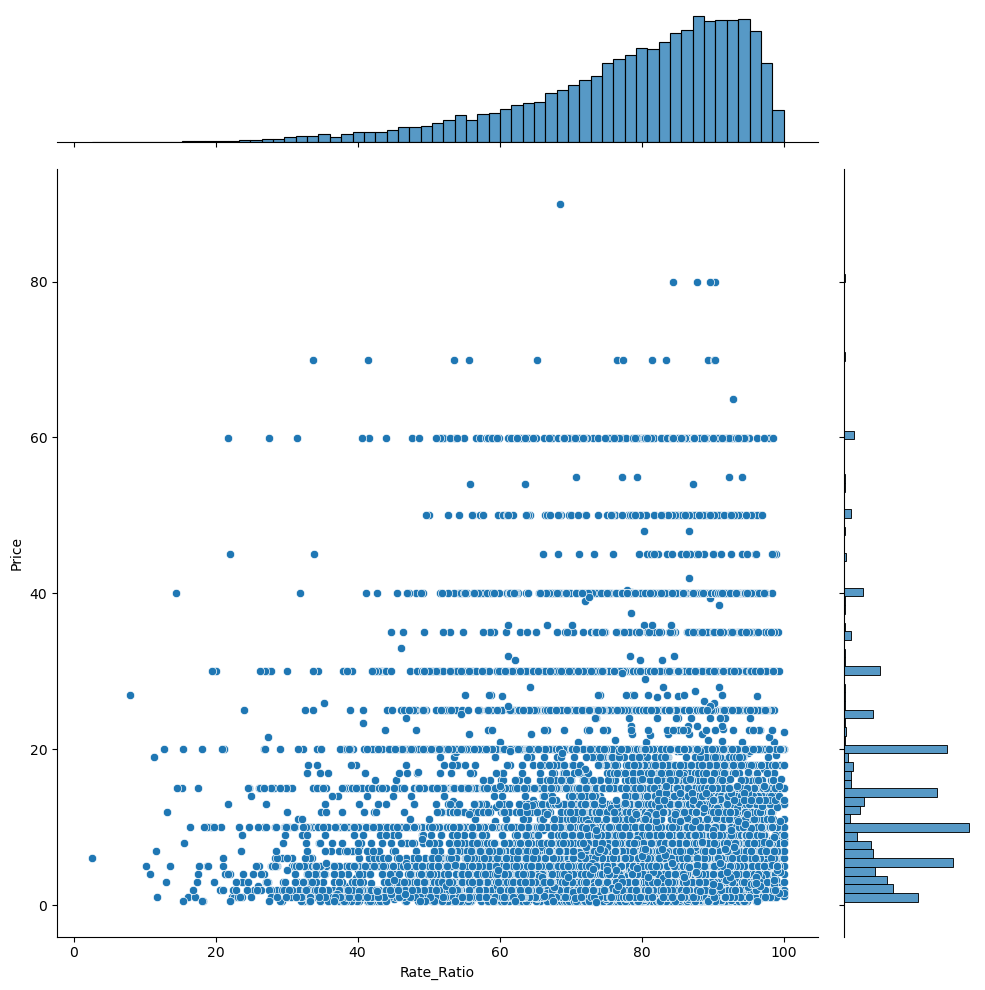

In [21]:
print(no_free.corr())
sb.jointplot(data=no_free, x="Rate_Ratio", y="Price", height=10)


---
Full Audio Languages

In [16]:
import regex as re
audio_data = pd.read_csv('data/Audio.csv')
index = 0

for row in game_data.itertuples(index = True, name = 'Data'):

    temp = re.sub('[\[\]\'\s]', '', row[12])   #remove square brackets and apostrophes from string
    temp = temp.split(',')    #split string by ',' into a list 

    if temp[0] == '':
        temp.clear()
        temp.append('None')                              

    length = len(temp)

    if temp[0] == 'None':
        length -= 1

    audio_data.at[index, 'Number of full audio languages'] = length   #store num of audio lang for each game

    audio_data.at[index, 'Full audio languages'] = temp   #store list of languages

    index += 1

audio_data.to_csv("data/Audio.csv", index=False)   #overwrite audio.csv
#print(audio_data.head())

0    0.0
1    0.0
2    2.0
3    0.0
4    1.0
Name: Number of full audio languages, dtype: float64
count    18272.000000
mean         1.418619
std          3.024076
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         29.000000
Name: Number of full audio languages, dtype: float64


<AxesSubplot:xlabel='Number of full audio languages', ylabel='Density'>

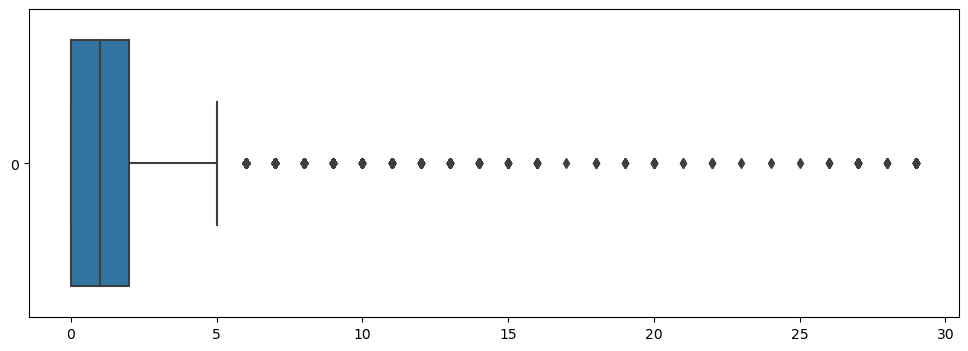

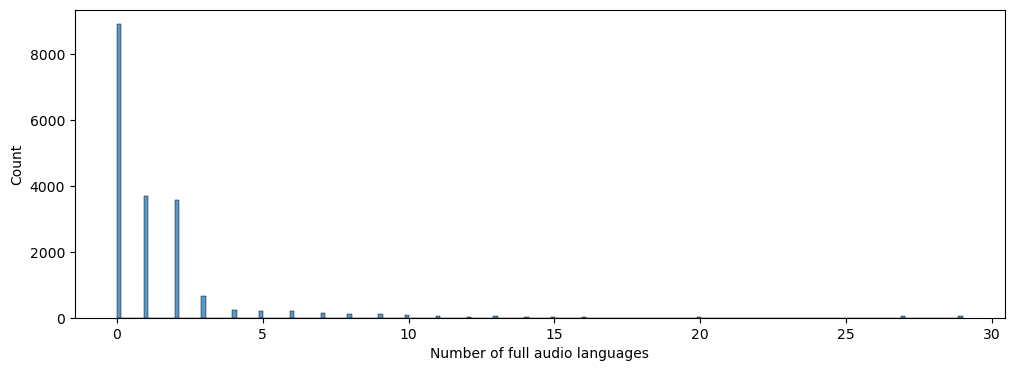

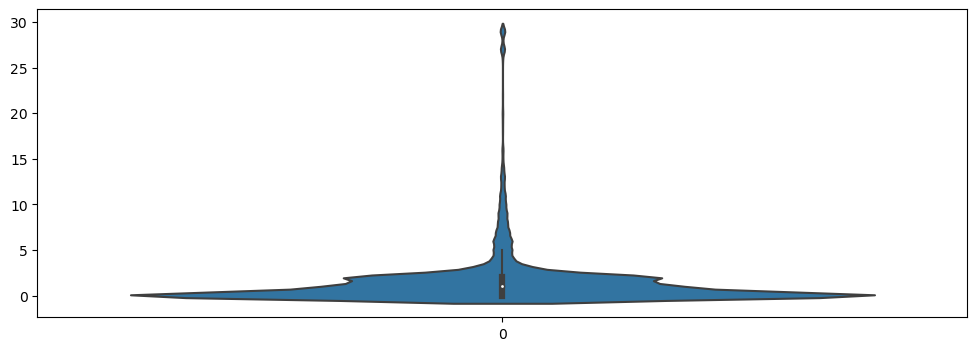

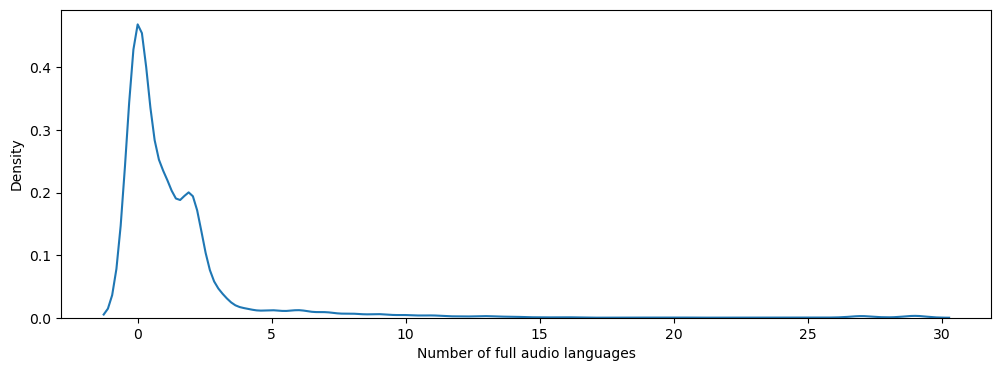

In [17]:
#univariate analysis of audio_count 
audio_count = audio_data['Number of full audio languages']
print(audio_count.head())

#summary
print(audio_count.describe())

#boxplot
f = plt.figure(figsize=(12, 4))
sb.boxplot(data = audio_count, orient = "h")

#hist plot
f = plt.figure(figsize=(12, 4))
sb.histplot(data = audio_count)

#violin plot
f = plt.figure(figsize=(12, 4))
sb.violinplot(data = audio_count)

#kde plot
f = plt.figure(figsize=(12, 4))
sb.kdeplot(data = audio_count)

   Number of full audio languages  Price
0                             0.0   0.00
1                             0.0  14.99
2                             2.0   3.99
3                             0.0  23.99
4                             1.0   0.00
                                Number of full audio languages    Price
Number of full audio languages                         1.00000  0.10362
Price                                                  0.10362  1.00000


<AxesSubplot:>

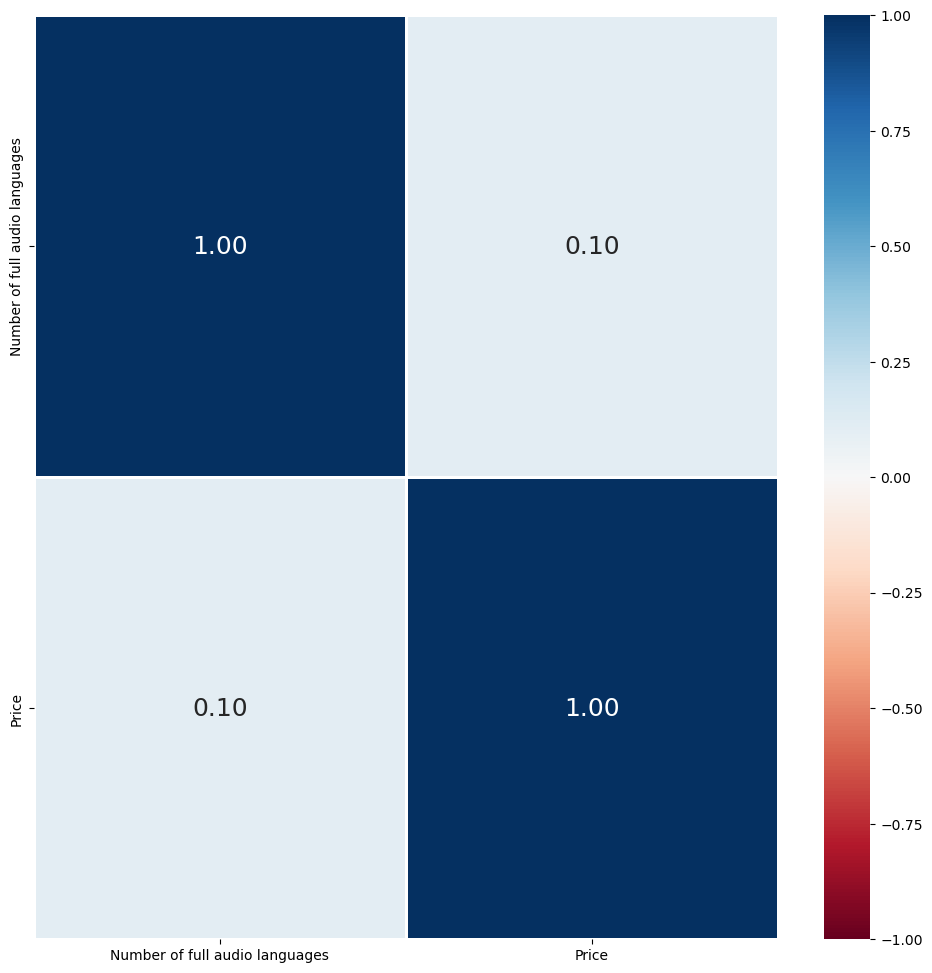

In [18]:
# Analyse relationship between audio count and price
# Add Price to the dataframe
audio_price = audio_count.copy()
audio_price = pd.concat([audio_price, game_data["Price"]], axis = 1).reindex(audio_price.index)
print(audio_price.head())

# Correlation Matrix
print(audio_price.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(audio_price.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

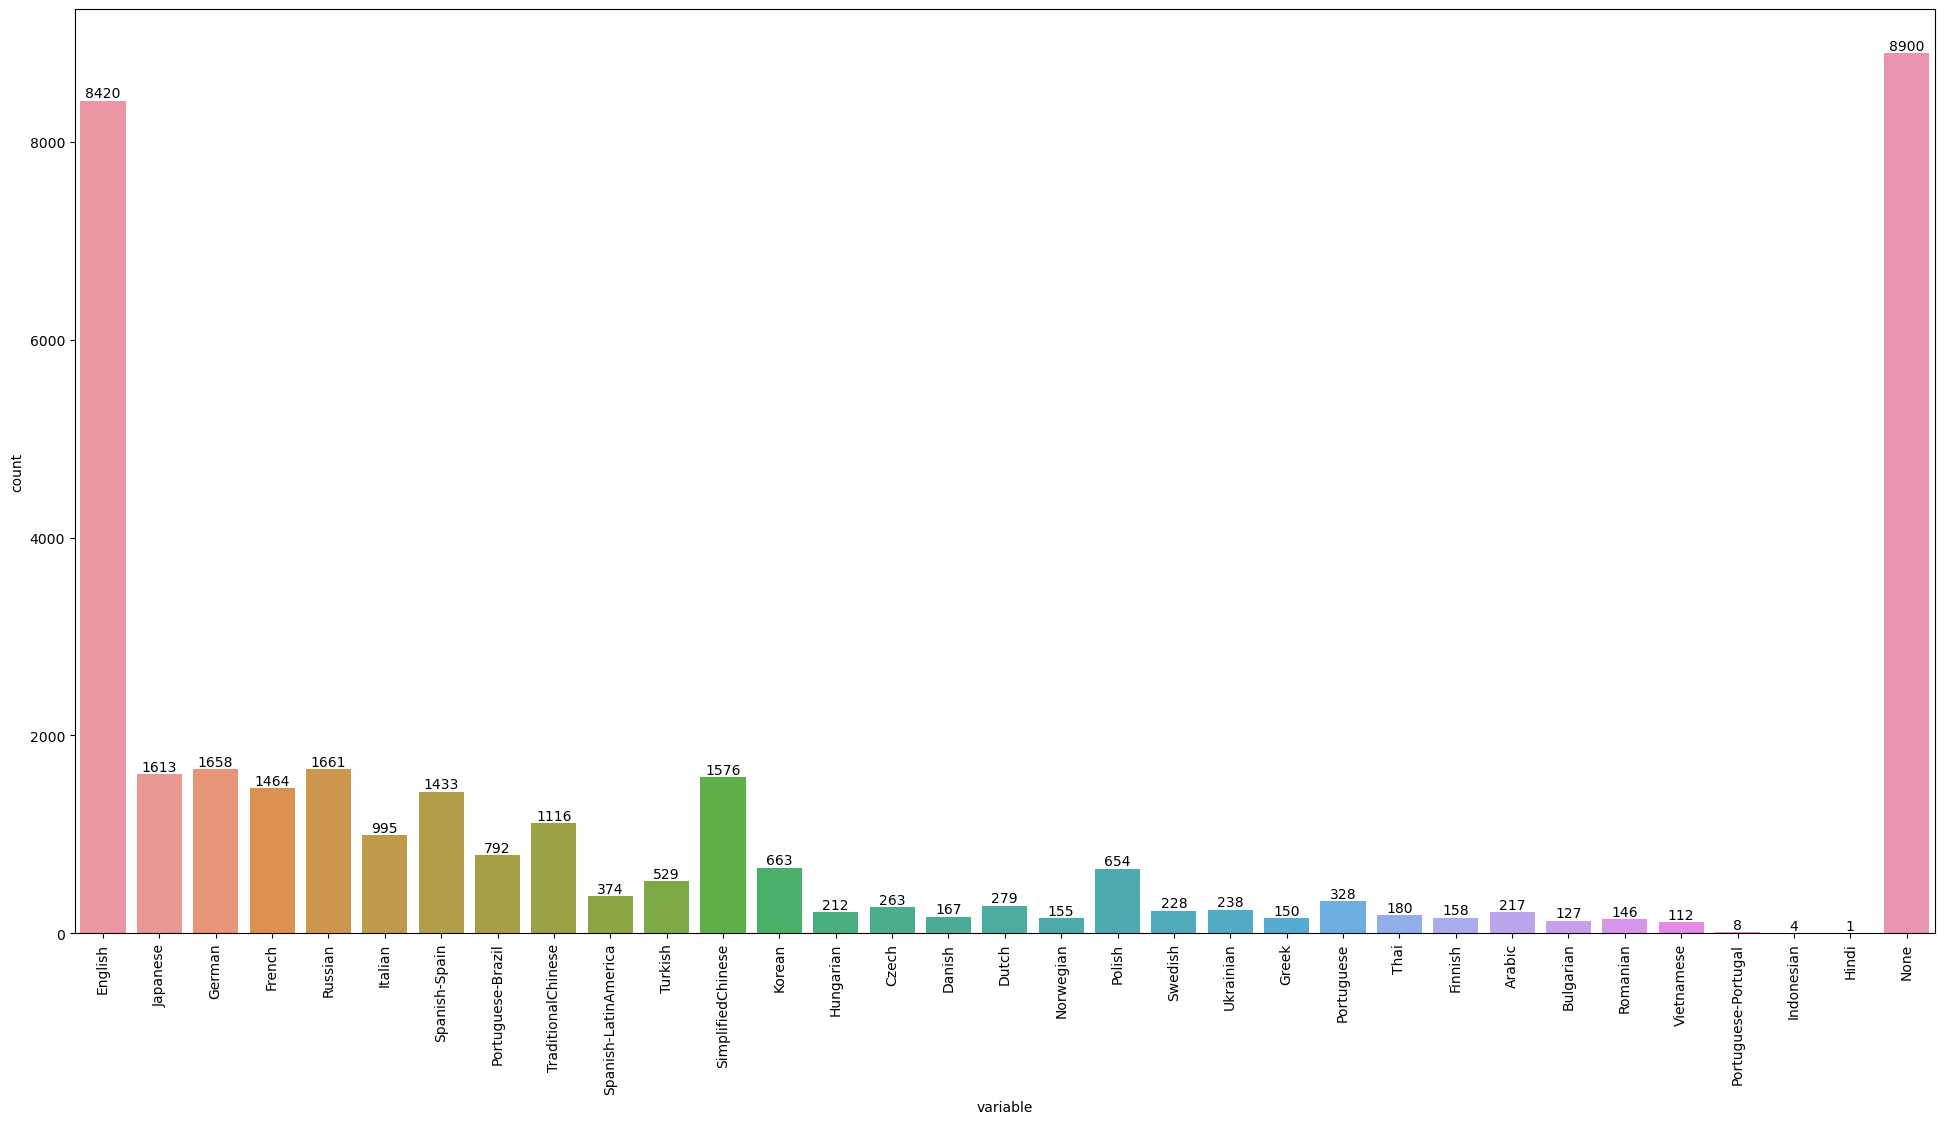

In [20]:
#countplot of each individual audio language
audio_sep = pd.read_csv('data/Audio_separated.csv')

audio_sep.drop(columns =['Price', 'AppID', 'Name'], inplace=True)

audio_sep2 = audio_sep.melt(value_vars=audio_sep.columns)
audio_sep2 = audio_sep2[audio_sep2["value"] != 'F']
f = plt.figure(figsize=(24, 12))

graph = sb.countplot(data=audio_sep2, x="variable")
graph.bar_label(graph.containers[0])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

plt.show()

count    8900.000000
mean        9.078590
std         9.805385
min         0.000000
25%         1.990000
50%         6.990000
75%        14.990000
max       269.990000
Name: None, dtype: float64


[Text(0, 0, 'English'),
 Text(1, 0, 'Japanese'),
 Text(2, 0, 'German'),
 Text(3, 0, 'French'),
 Text(4, 0, 'Russian'),
 Text(5, 0, 'Italian'),
 Text(6, 0, 'Spanish-Spain'),
 Text(7, 0, 'Portuguese-Brazil'),
 Text(8, 0, 'TraditionalChinese'),
 Text(9, 0, 'Spanish-LatinAmerica'),
 Text(10, 0, 'Turkish'),
 Text(11, 0, 'SimplifiedChinese'),
 Text(12, 0, 'Korean'),
 Text(13, 0, 'Hungarian'),
 Text(14, 0, 'Czech'),
 Text(15, 0, 'Danish'),
 Text(16, 0, 'Dutch'),
 Text(17, 0, 'Norwegian'),
 Text(18, 0, 'Polish'),
 Text(19, 0, 'Swedish'),
 Text(20, 0, 'Ukrainian'),
 Text(21, 0, 'Greek'),
 Text(22, 0, 'Portuguese'),
 Text(23, 0, 'Thai'),
 Text(24, 0, 'Finnish'),
 Text(25, 0, 'Arabic'),
 Text(26, 0, 'Bulgarian'),
 Text(27, 0, 'Romanian'),
 Text(28, 0, 'Vietnamese'),
 Text(29, 0, 'Portuguese-Portugal'),
 Text(30, 0, 'Indonesian'),
 Text(31, 0, 'Hindi'),
 Text(32, 0, 'None')]

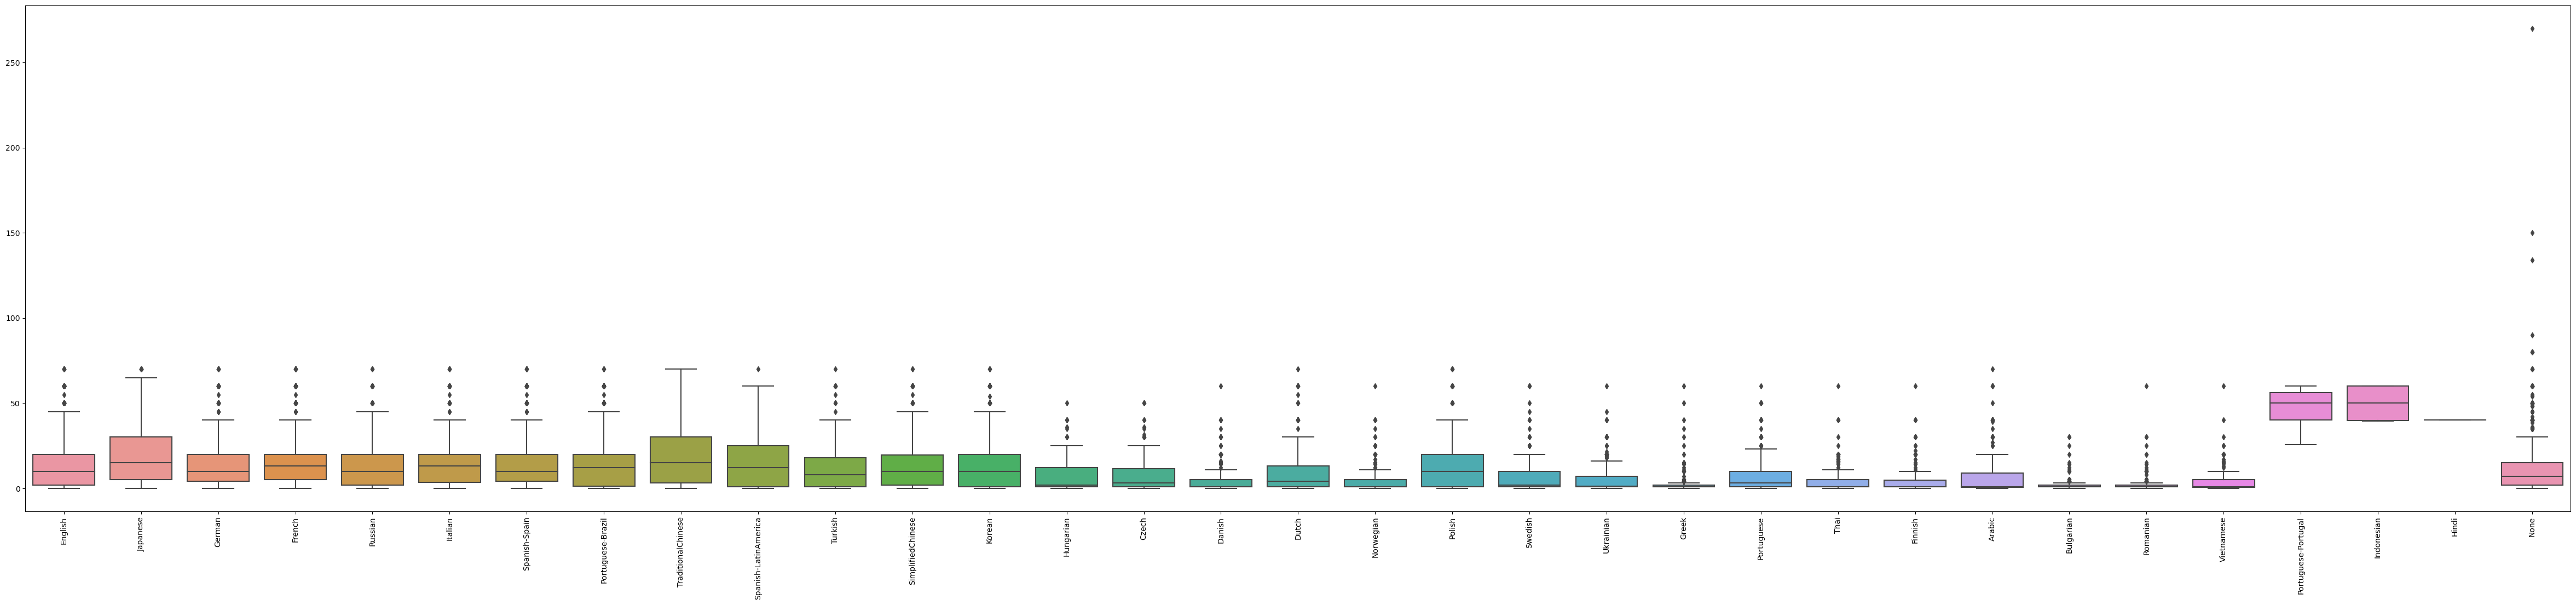

In [23]:
# boxplots for every audio language against price

#print(audio_sep_price.head())
audio_sep_price = pd.read_csv('data/Audio_separated2.csv').copy()
print(audio_sep_price['None'].describe())

#audio_sep_price = pd.read_csv('Audio_separated_price.csv').copy()
audio_sep_price = audio_sep_price.drop(columns =['AppID', 'Price'])
f = plt.figure(figsize=(60, 12))


graph = sb.boxplot(data = audio_sep_price)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

---
Languages

In [25]:
import regex as re
lang_data = pd.read_csv('data/Lang.csv')
index = 0


for row in game_data.itertuples(index = True, name = 'Data'):

    temp = re.sub('[\[\]\'\s]', '', row[11])   #remove square brackets and apostrophes from string
    temp = temp.split(',')    #split string by ',' into a list 

    if temp[0] == '':
        temp.clear()
        temp.append('None')                              

    length = len(temp)

    if temp[0] == 'None':
        length -= 1

    lang_data.at[index, 'Number of languages'] = length   #store num of audio lang for each game

    lang_data.at[index, 'Languages'] = temp   #store list of languages

    index += 1

lang_data.to_csv("Lang.csv", index=False)   #overwrite audio.csv
print(lang_data.head())


     AppID                       Name  Number of languages  \
0  1469160             Wartune Reborn                  1.0   
1  1178150      MazM: Jekyll and Hyde                 10.0   
2   320150  Deadlings: Rotten Edition                  9.0   
3  1026420                     WARSAW                  5.0   
4   485000             Cthulhu Realms                  1.0   

                                           Languages  
0                                          [English]  
1  [English, French, Italian, German, Spanish-Spa...  
2  [English, Polish, French, Italian, German, Spa...  
3         [English, French, German, Polish, Russian]  
4                                          [English]  


0     1.0
1    10.0
2     9.0
3     5.0
4     1.0
Name: Number of languages, dtype: float64
count    18272.000000
mean         5.069396
std          5.269830
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max         29.000000
Name: Number of languages, dtype: float64


<AxesSubplot:xlabel='Number of languages', ylabel='Density'>

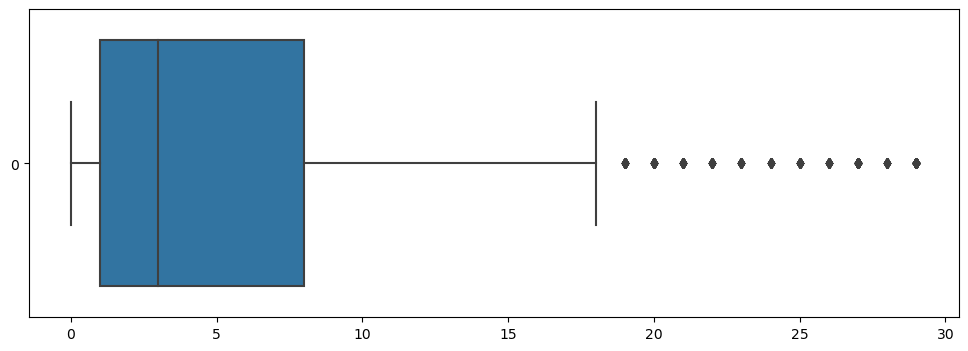

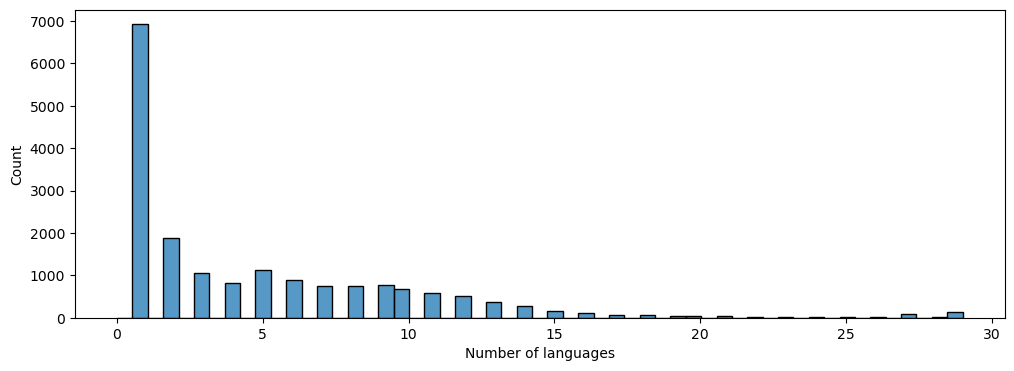

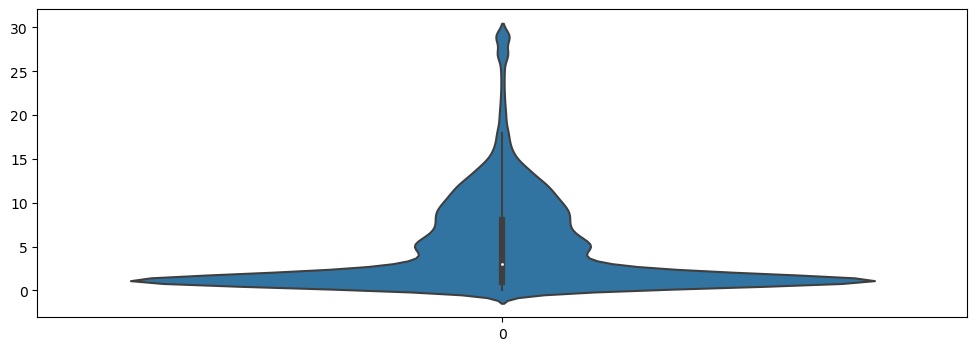

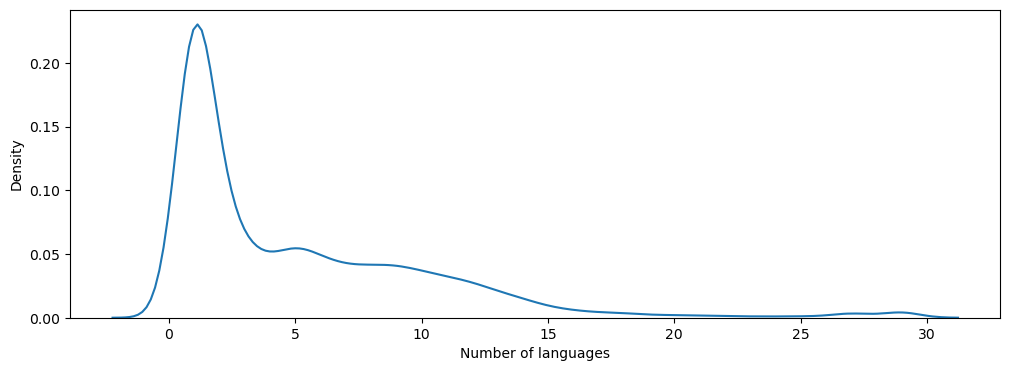

In [29]:
#univariate analysis of lang_count 
lang_count = lang_data['Number of languages']
print(lang_count.head())

#summary
print(lang_count.describe())

#boxplot
f = plt.figure(figsize=(12, 4))
sb.boxplot(data = lang_count, orient = "h")

#hist plot
f = plt.figure(figsize=(12, 4))
sb.histplot(data = lang_count)

#violin plot
f = plt.figure(figsize=(12, 4))
sb.violinplot(data = lang_count)

#kde plot
f = plt.figure(figsize=(12, 4))
sb.kdeplot(data = lang_count)

   Number of languages  Price
0                  1.0   0.00
1                 10.0  14.99
2                  9.0   3.99
3                  5.0  23.99
4                  1.0   0.00
                     Number of languages     Price
Number of languages             1.000000  0.179074
Price                           0.179074  1.000000


<AxesSubplot:>

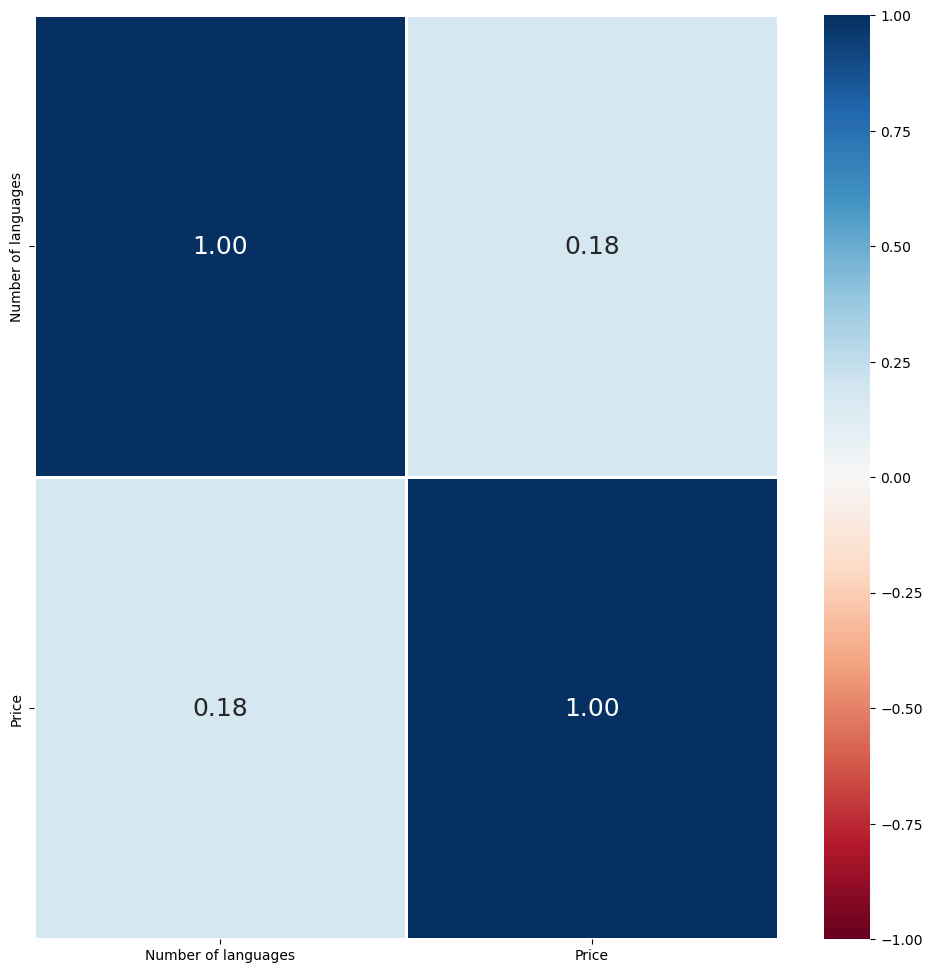

In [30]:
# Analyse relationship between lang count and price
# Add Price to the dataframe
lang_price = lang_count.copy()
lang_price = pd.concat([lang_price, game_data["Price"]], axis = 1).reindex(lang_price.index)
print(lang_price.head())

# Correlation Matrix
print(lang_price.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(lang_price.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

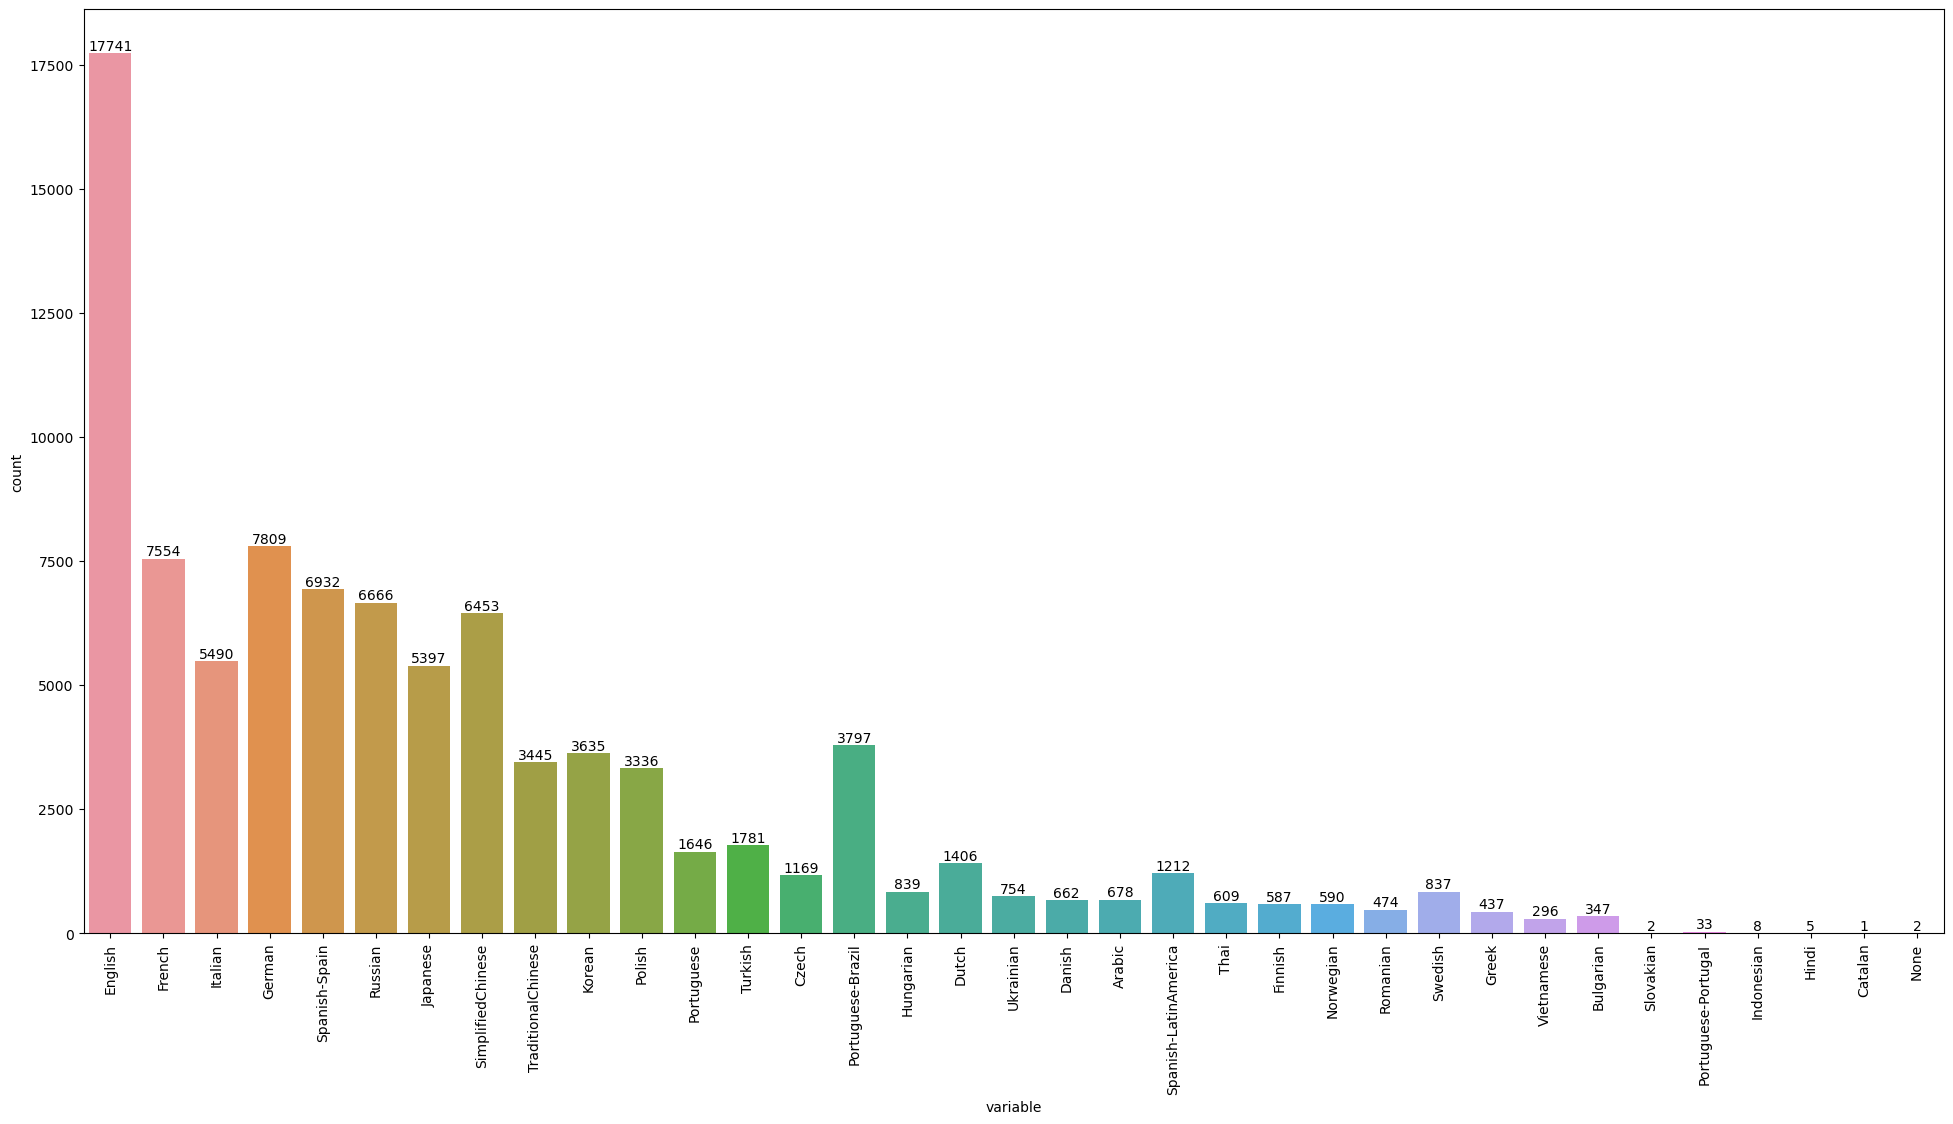

In [32]:
#countplot of each individual language
lang_sep = pd.read_csv('data/Lang_separated.csv')

lang_sep.drop(columns =['Price', 'AppID', 'Name'], inplace=True)

lang_sep2 = lang_sep.melt(value_vars=lang_sep.columns)
lang_sep2 = lang_sep2[lang_sep2["value"] != 'F']
f = plt.figure(figsize=(24, 12))

graph = sb.countplot(data=lang_sep2, x="variable")
graph.bar_label(graph.containers[0])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

plt.show()

count     2.00000
mean     32.49000
std      17.67767
min      19.99000
25%      26.24000
50%      32.49000
75%      38.74000
max      44.99000
Name: None, dtype: float64


[Text(0, 0, 'English'),
 Text(1, 0, 'French'),
 Text(2, 0, 'Italian'),
 Text(3, 0, 'German'),
 Text(4, 0, 'Spanish-Spain'),
 Text(5, 0, 'Russian'),
 Text(6, 0, 'Japanese'),
 Text(7, 0, 'SimplifiedChinese'),
 Text(8, 0, 'TraditionalChinese'),
 Text(9, 0, 'Korean'),
 Text(10, 0, 'Polish'),
 Text(11, 0, 'Portuguese'),
 Text(12, 0, 'Turkish'),
 Text(13, 0, 'Czech'),
 Text(14, 0, 'Portuguese-Brazil'),
 Text(15, 0, 'Hungarian'),
 Text(16, 0, 'Dutch'),
 Text(17, 0, 'Ukrainian'),
 Text(18, 0, 'Danish'),
 Text(19, 0, 'Arabic'),
 Text(20, 0, 'Spanish-LatinAmerica'),
 Text(21, 0, 'Thai'),
 Text(22, 0, 'Finnish'),
 Text(23, 0, 'Norwegian'),
 Text(24, 0, 'Romanian'),
 Text(25, 0, 'Swedish'),
 Text(26, 0, 'Greek'),
 Text(27, 0, 'Vietnamese'),
 Text(28, 0, 'Bulgarian'),
 Text(29, 0, 'Slovakian'),
 Text(30, 0, 'Portuguese-Portugal'),
 Text(31, 0, 'Indonesian'),
 Text(32, 0, 'Hindi'),
 Text(33, 0, 'Catalan'),
 Text(34, 0, 'None')]

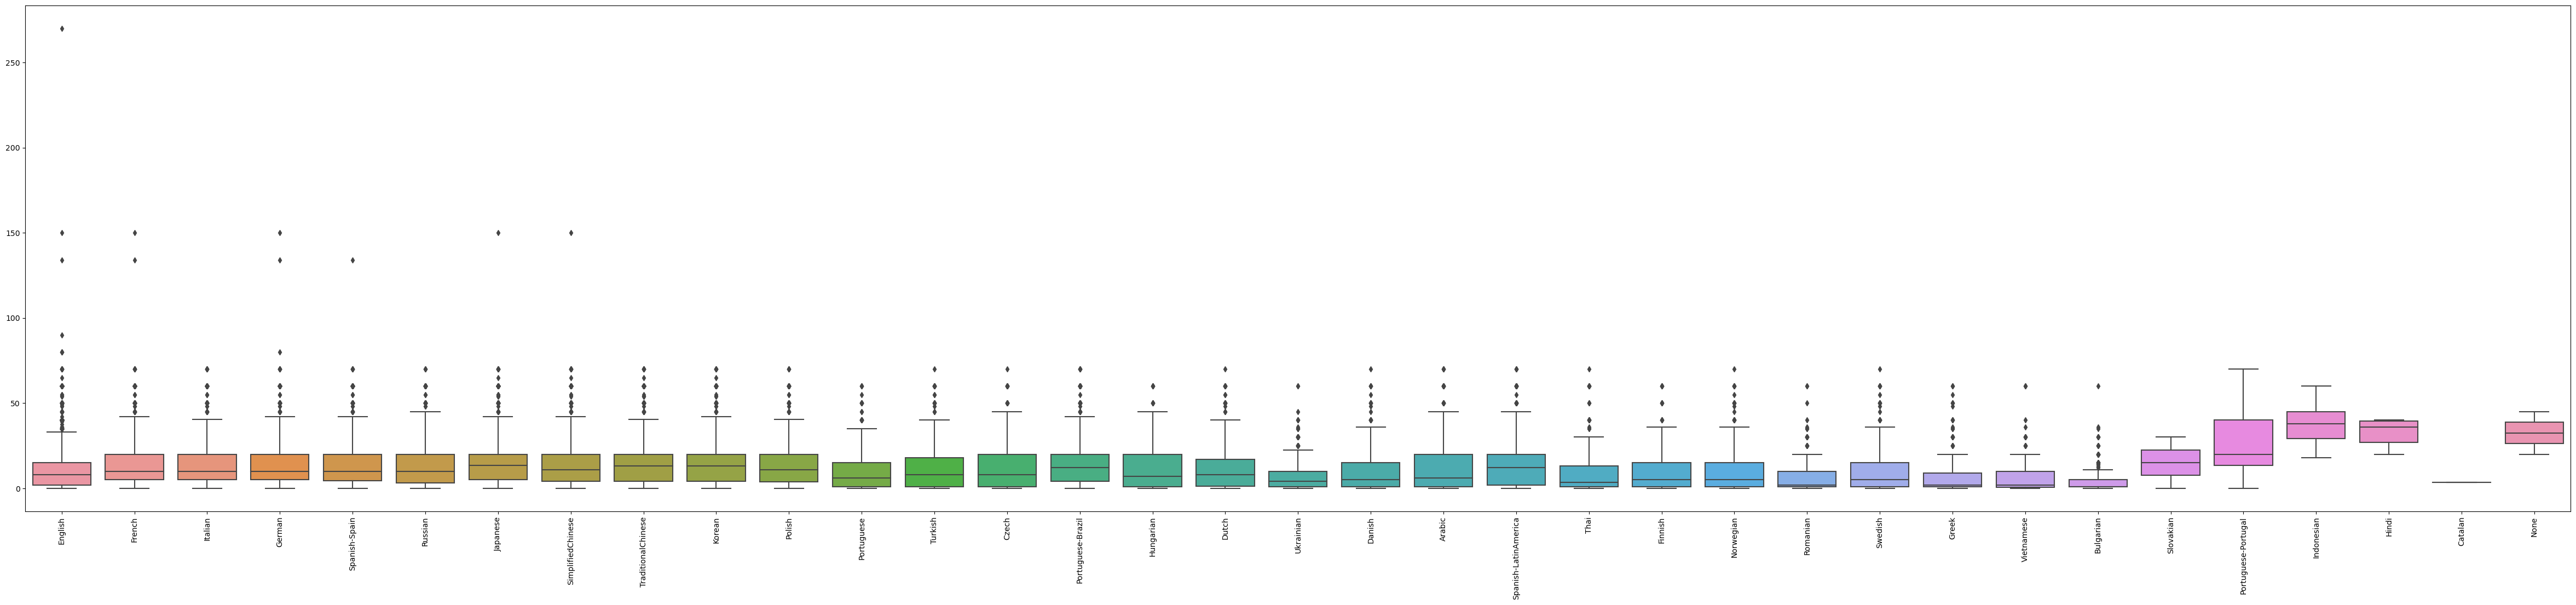

In [35]:
# boxplots for every language against price

lang_sep_price = pd.read_csv('data/lang_separated2.csv').copy()
print(lang_sep_price['None'].describe())

lang_sep_price = lang_sep_price.drop(columns =['AppID', 'Price'])
f = plt.figure(figsize=(60, 12))

graph = sb.boxplot(data = lang_sep_price)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)


---
OS: Windows, Mac, Linux

In [36]:
OS = pd.DataFrame(game_data[['Windows', 'Mac', 'Linux']])

#summary
print(OS.describe())

       Windows    Mac  Linux
count    18272  18272  18272
unique       2      2      2
top       True  False  False
freq     18269  12306  14313


In [37]:
os_sep_price = pd.read_csv('data/OS2.csv').copy()
print(os_sep_price['Windows Only'].describe())
print(os_sep_price['Mac Only'].describe())
print(os_sep_price['Linux Only'].describe())
print(os_sep_price['Mac and Linux'].describe())
print(os_sep_price['Windows and Linux'].describe())
print(os_sep_price['Windows and Mac'].describe())
print(os_sep_price['All'].describe())

os_sep_price.drop(columns='None', inplace=True)

count    11864.000000
mean        11.515802
std         12.373623
min          0.000000
25%          1.990000
50%          8.990000
75%         17.990000
max        134.100000
Name: Windows Only, dtype: float64
count    1.0
mean     0.0
std      NaN
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: Mac Only, dtype: float64
count     1.00
mean     29.99
std        NaN
min      29.99
25%      29.99
50%      29.99
75%      29.99
max      29.99
Name: Linux Only, dtype: float64
count    1.00
mean     4.99
std       NaN
min      4.99
25%      4.99
50%      4.99
75%      4.99
max      4.99
Name: Mac and Linux, dtype: float64
count    441.000000
mean       8.391610
std        8.845871
min        0.000000
25%        0.990000
50%        5.990000
75%       12.990000
max       49.990000
Name: Windows and Linux, dtype: float64
count    2448.000000
mean        9.390584
std        10.558898
min         0.000000
25%         1.990000
50%         6.990000
75%        14.990000
max   

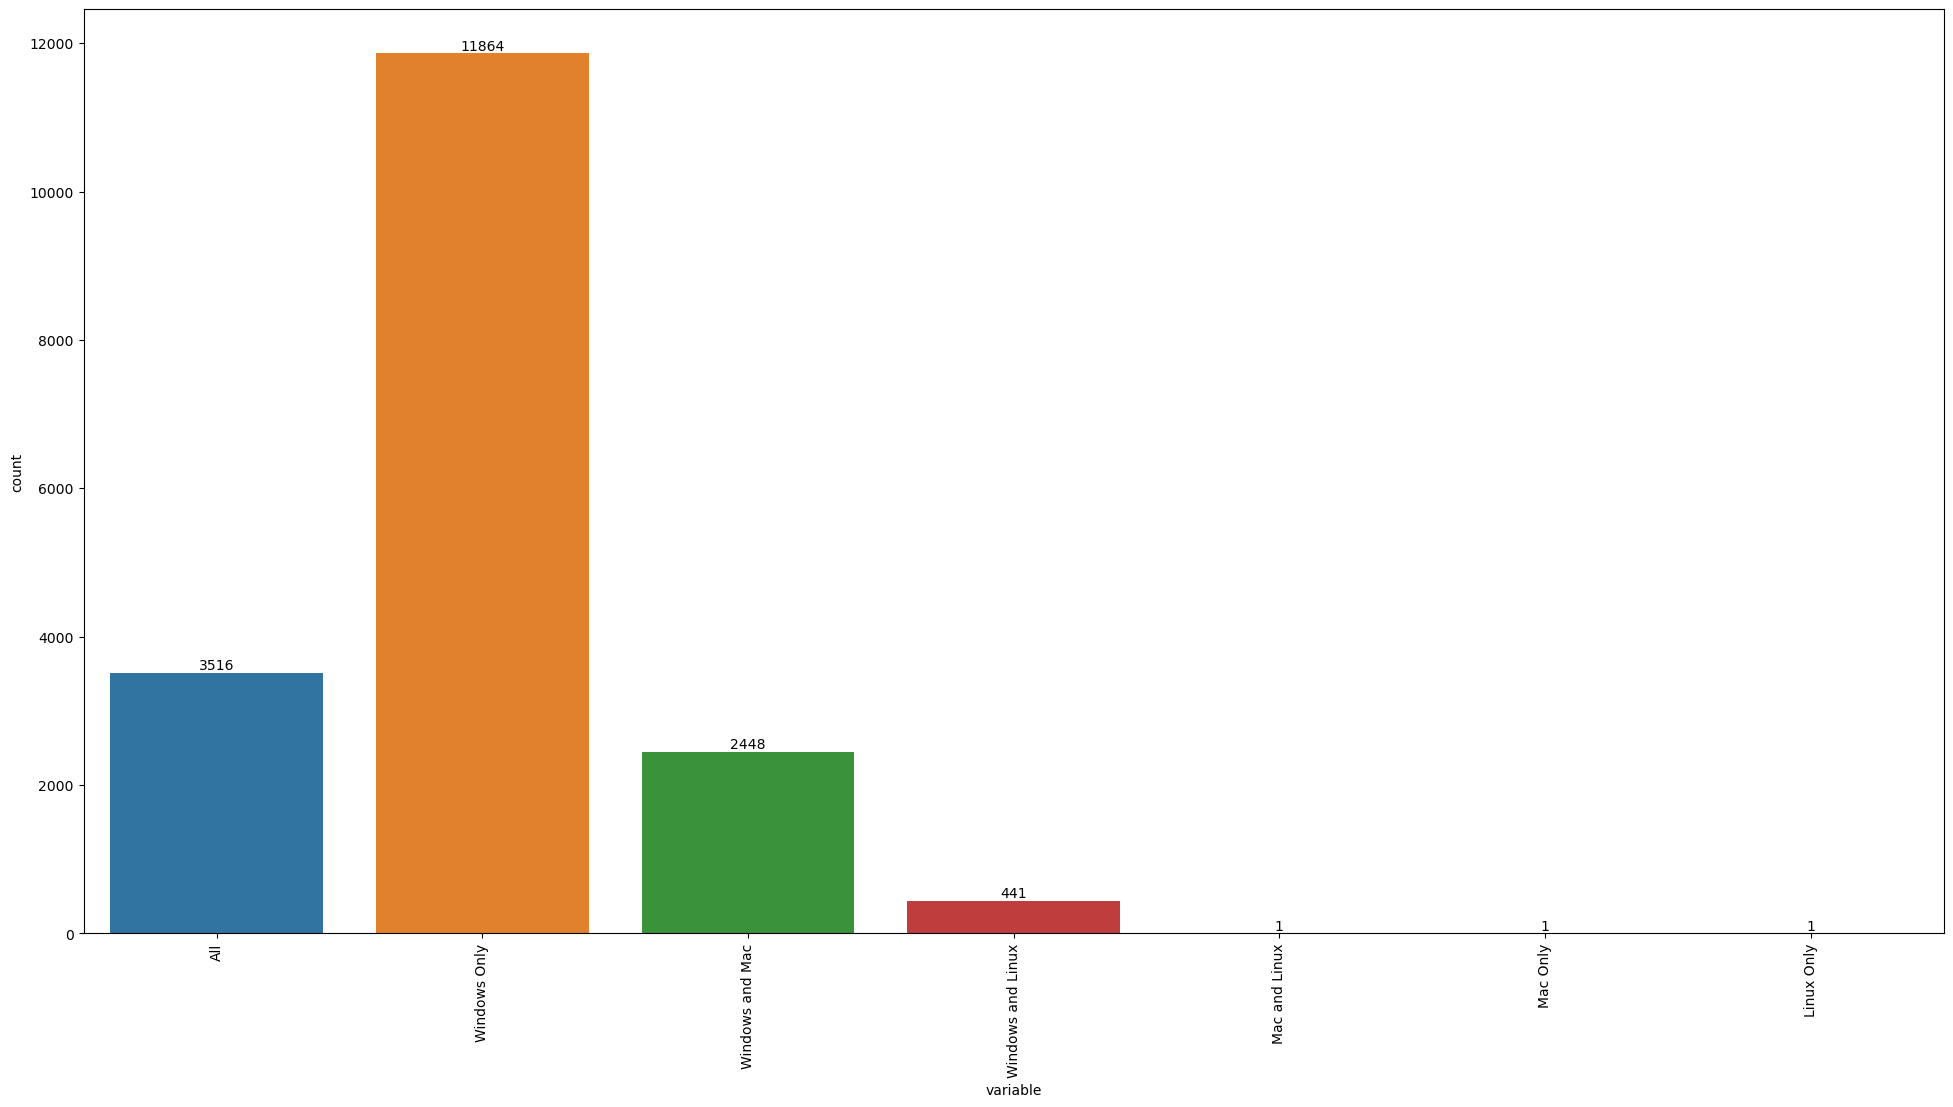

In [38]:
#countplot of OS
OS_sep = pd.read_csv('data/OS.csv')

OS_sep2 = OS_sep.melt(value_vars=OS_sep.columns)
OS_sep2 = OS_sep2[OS_sep2["value"] != 'F']

f = plt.figure(figsize=(24, 12))

graph = sb.countplot(data=OS_sep2, x="variable")
graph.bar_label(graph.containers[0])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

plt.show()

[Text(0, 0, 'All'),
 Text(1, 0, 'Windows Only'),
 Text(2, 0, 'Windows and Mac'),
 Text(3, 0, 'Windows and Linux'),
 Text(4, 0, 'Mac and Linux'),
 Text(5, 0, 'Mac Only'),
 Text(6, 0, 'Linux Only'),
 Text(7, 0, 'None')]

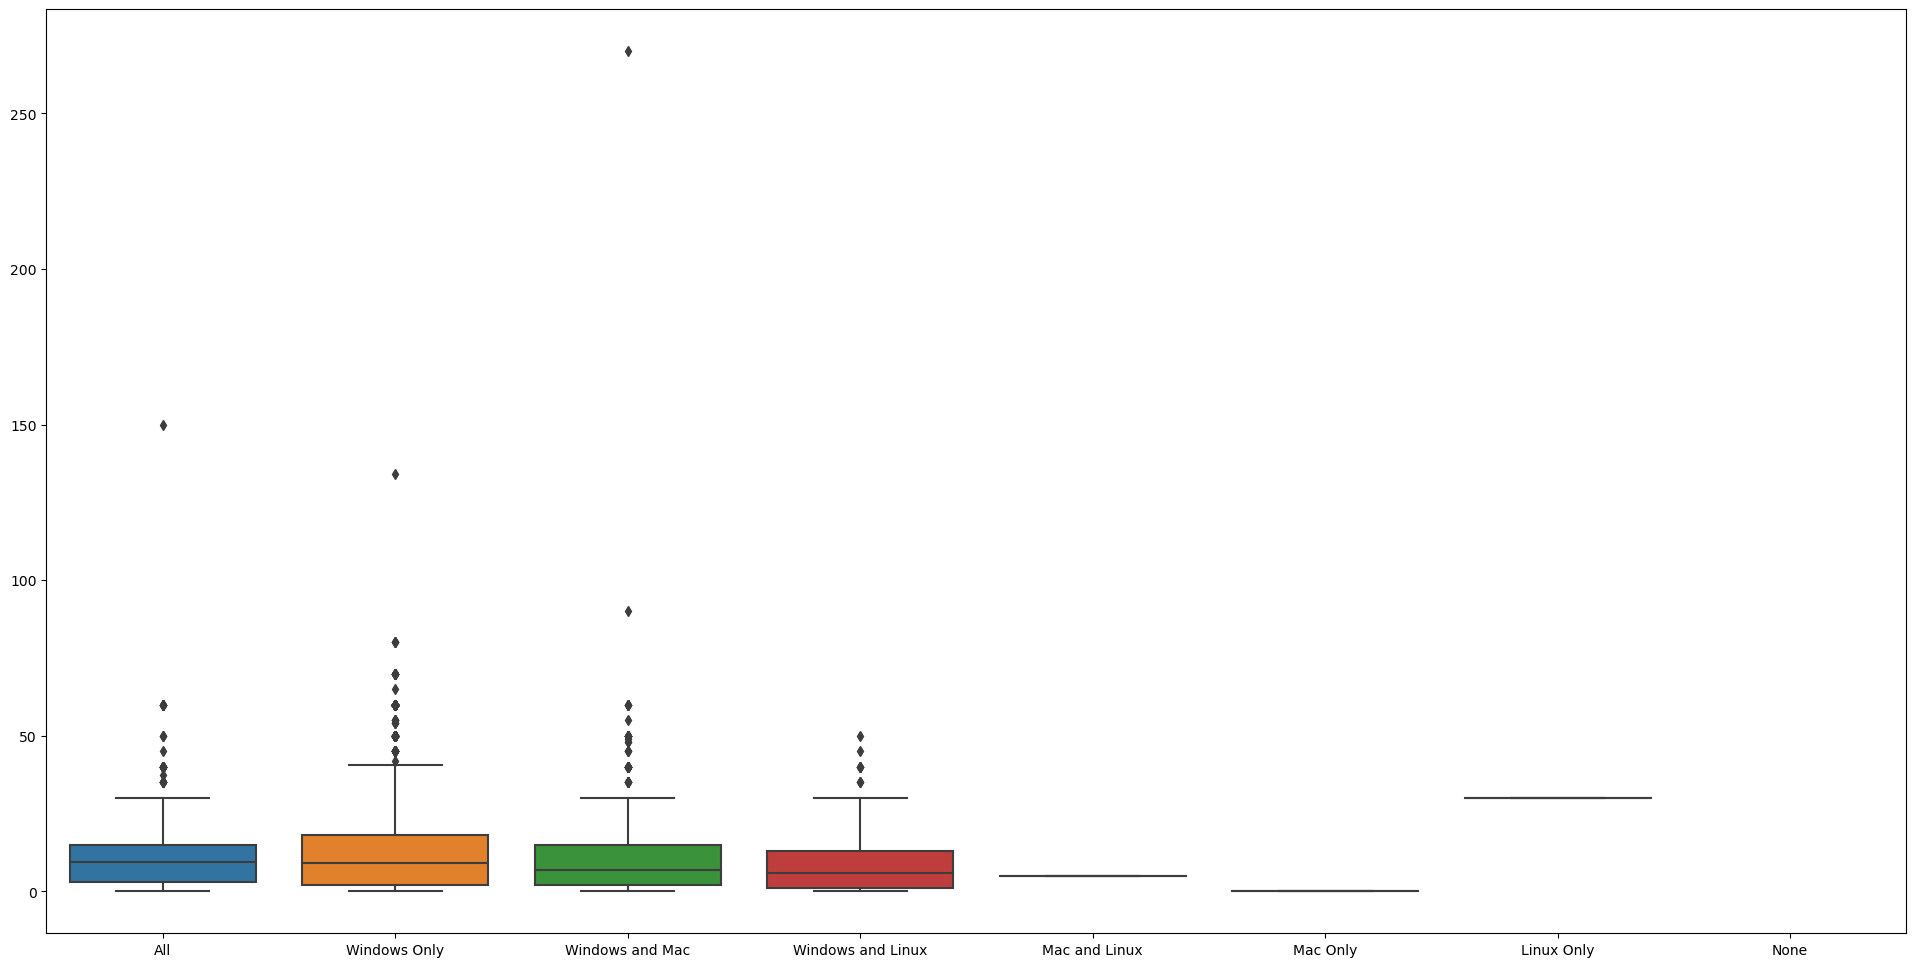

In [39]:
# boxplots of OS against price
OS_sep = pd.read_csv('data/OS2.csv')

f = plt.figure(figsize=(24, 12))

graph = sb.boxplot(data = OS_sep)

graph.set_xticklabels(graph.get_xticklabels())